# Complex plane partition

In this notebook we can see how the complex plane is partitioned depending on the parameter $\alpha$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mittleff

In [2]:
def plot_partition(alpha, L = 6, npoints = 10):
    params = mittleff.compute_secondary_params(alpha)
    funcs = [mittleff.cmplxreg.in_G0, mittleff.cmplxreg.in_G1, 
             mittleff.cmplxreg.in_G2, mittleff.cmplxreg.in_G3,
             mittleff.cmplxreg.in_G4, mittleff.cmplxreg.in_G5,
             mittleff.cmplxreg.in_G6]
    colors = ["#00876c", "#6eab79", "#b7ce8f", 
              "#fff1b1", "#f4bb79", "#e98058", 
              "#d43d51"]
    fig, ax = plt.subplots()
    
    for x in np.linspace(-L, L, npoints):
        for y in np.linspace(-L, L, npoints):
            z = x + y*1j
            for i in range(len(funcs)):
                if funcs[i](z, params):
                    ax.scatter(x, y, color = colors[i])
    
    # Stokes lines
    L = L-2
    ax.plot((0, L), (0,  L*np.pi*alpha), color = "#0000ff", linestyle = "--") 
    ax.plot((0, L), (0, -L*np.pi*alpha), color = "#0000ff", linestyle = "--") 
    
    tbl = ax.table(cellText = [" " for i in range(len(funcs))],
             colWidths = [0.1]*len(funcs),
             rowLabels=[f"$G_{i}$" for i in range(len(funcs))],
             bbox=[1.1, 0.42, 0.1,0.3])
    for i in range(len(funcs)):
        tbl.get_celld()[(i,0)].set_facecolor(colors[i])
    
    # set aspect ratio to 1
    ratio = 1.0
    x_left, x_right = ax.get_xlim()
    y_low, y_high = ax.get_ylim()
    ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
    ax.set_xlabel("Re(z)")
    ax.set_ylabel("Im(z)")
    ax.set_title(f"alpha = {alpha:.2f}")
    
    plt.show()

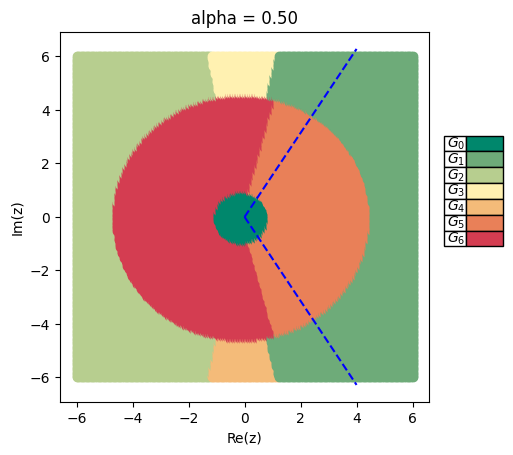

CPU times: user 40min 59s, sys: 1min 12s, total: 42min 12s
Wall time: 42min 19s


In [3]:
%%time
plot_partition(1/2, L = 6, npoints = 200)

In [4]:
# plot_partition(1/3, L = 6, npoints = 500)